## Model Training

### 1.1 Import data and required libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

### Import the data

In [3]:
data=pd.read_csv("D:/ML_PROJECT_1/notebooks/data/stud.csv")
data.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


### Preparing X and Y labels

In [4]:
X=data.drop(columns=['math_score'],axis=1)
y=data['math_score']

### Creating Column transformer 

In [5]:
numerical_features=X.select_dtypes(exclude='object').columns
categorical_features=X.select_dtypes(include='object').columns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
ohe=OneHotEncoder()
scaler=StandardScaler()
preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",ohe,categorical_features),
        ("StandardScaler",scaler,numerical_features)
    ]
)

In [6]:
X=preprocessor.fit_transform(X)


In [7]:
X.shape

(1000, 19)

### Spliting the data training and test


In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


### Model evaluation

In [9]:
def evaluate(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    r2=r2_score(true,predicted)
    return mae,mse,r2

### Models Performance

In [16]:
models={
    'Linear Regression' : LinearRegression(),
    'Ridge Regression' : Ridge(),
    'Lasso Regression' : Lasso(),
    'Random Forest'    : RandomForestRegressor(),
    'Decision Tree'    :DecisionTreeRegressor(),
    'SVM'              :SVR(),
    'XGBRegressor'     :XGBRegressor(),
    'catboost'         :CatBoostRegressor(verbose=False),
    'KNeighbors Regreessor': KNeighborsRegressor()
}
models_list=[]
r2_list=[]
for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #calculate predicted value
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    #Evaluating the values
    mae_train,mse_train,r2_train=evaluate(y_train,y_train_pred)
    mae_test,mse_test,r2_test= evaluate(y_test,y_test_pred)

    models_list.append(list(models.keys())[i])
    print(model,'\n')
    
    print('Model performance for train data')
    print('mae score is : {} '.format(mae_train))
    print('mse score is : {} '.format(mse_train))
    print('r2 score is  : {}'.format(r2_train))
    
    print('------------------------------')
    
    print('Model performance on test data')
    print('mae score is : {} '.format(mae_test))
    print('mse score is : {} '.format(mse_test))
    print('r2 score is  : {}'.format(r2_test))
    r2_list.append(r2_test)
    print('\n')


    
    
  
    

LinearRegression() 

Model performance for train data
mae score is : 4.205982142857143 
mse score is : 27.58877232142857 
r2 score is  : 0.8749315186727399
------------------------------
Model performance on test data
mae score is : 4.4325 
mse score is : 31.068958333333335 
r2 score is  : 0.8751300967143417


Ridge() 

Model performance for train data
mae score is : 4.1976769609022035 
mse score is : 27.54838217384225 
r2 score is  : 0.8751146197676473
------------------------------
Model performance on test data
mae score is : 4.415505801902551 
mse score is : 30.875711669044275 
r2 score is  : 0.8759067784434541


Lasso() 

Model performance for train data
mae score is : 5.158226125142767 
mse score is : 42.38746971802188 
r2 score is  : 0.807844422971275
------------------------------
Model performance on test data
mae score is : 5.392913577222256 
mse score is : 47.20410059865967 
r2 score is  : 0.8102810073900306


RandomForestRegressor() 

Model performance for train data
mae sc

#### performance of each Regressor

In [17]:
pd.DataFrame(list(zip(models_list,r2_list)),columns=['Model_Name','R2_score']).sort_values(by=['R2_score'],ascending=False)

,Model_Name,R2_score
1,Ridge Regression,0.875907
0,Linear Regression,0.875130
7,catboost,0.852108
3,Random Forest,0.848102
6,XGBRegressor,0.811816
2,Lasso Regression,0.810281
8,KNeighbors Regreessor,0.772166
5,SVM,0.726848
4,Decision Tree,0.722279


### Linear Regression

In [20]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print('model accuracy is : %.2f' %score)

model accuracy is : 87.51


### Plot true and predicted value

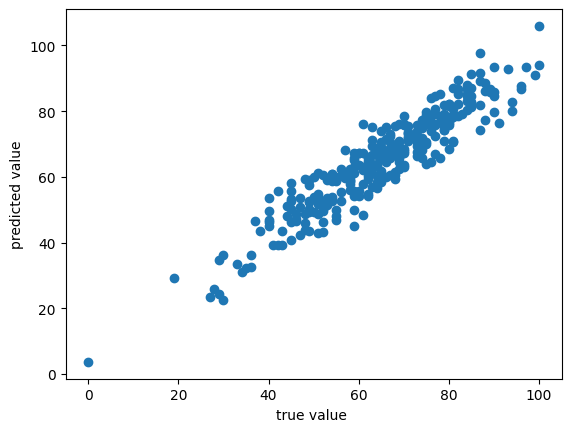

In [23]:
plt.scatter(y_test,y_pred)
plt.xlabel("true value ")
plt.ylabel("predicted value")
plt.show()

#### Regression plot


<Axes: xlabel='math_score'>

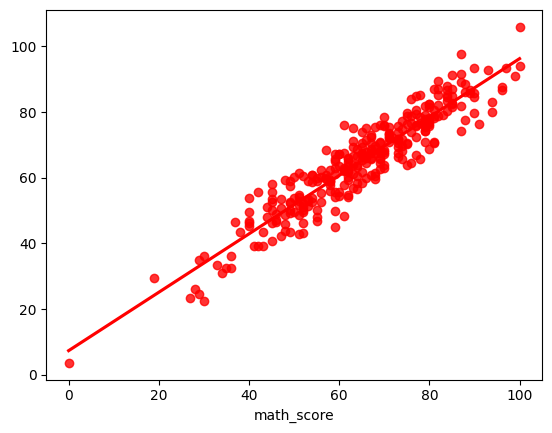

In [25]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

### Difference Between actual and predicted values

In [26]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.46875,14.53125
737,53,59.15625,-6.15625
740,80,76.96875,3.03125
660,74,77.37500,-3.37500
411,84,87.93750,-3.93750
...,...,...,...
468,77,72.46875,4.53125
935,70,63.00000,7.00000
428,65,58.43750,6.56250
7,40,45.18750,-5.18750
